# Proyek Analisis Data: Nama dataset
- Nama:Adhityah Anugrah
- Email:
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

Sekarang ini sedang maraknya kebakaran hutan yang menyebabkan Air Quality Index (AQI) semakin Buruk, partikel PM2.5 dan PM10 yang menimbulkan kekhawatiran beraktifitas diluar ruangan.

Saat terjadinya kebakaran hutan, maka dilakukan proses hujan buatan untuk memperbaiki AQI, termasuk memperbaiki kualitas PM2.5 dan PM10.

Berdasarkan hal tersebut timbul beberapa pertanyaan, yaitu:

- Apakah hujan mempengaruhi kondisi PM2.5 dan PM10 
- Bagaimana kondisi PM2.5 dan PM10 saat ada hujan dan tidak
- Apakah pengaruh curah hujan pada PM2.5 dan PM10

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Mengambil data dati semua station

In [2]:
all_df = []
file_name = ['aotizhongxin.csv','changping.csv','dingling.csv','dongsi.csv','guanyuan.csv','gucheng.csv','huairou.csv','nongzhanguan.csv','shunyi.csv','tiantan.csv','wanliu.csv','wanshouxigong.csv']

for file in file_name:
    df = pd.read_csv('data/'+file)
    all_df.append(df)

df_data = pd.concat(all_df, ignore_index=True)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### Assessing Data

Menyeleksi kolom yang akan digunakan dan menggunakan data diatas tahun 2013,
karena data tahun 2013 tidak ada bulan januari dan februari,
untuk analisis data akan dilakukan rata-rata pm2.5 dan pm10 secara perbulan,
dan jumlah hujan perbulan

In [3]:
df_olah = df_data[['year','month','day','hour','PM2.5','PM10','RAIN','station']]
df_olah = df_olah[df_olah['year'] > 2013]
df_olah = df_olah.reset_index(drop=True)

df_olah

,year,month,day,hour,PM2.5,PM10,RAIN,station
0,2014,1,1,0,20.0,90.0,0.0,Aotizhongxin
1,2014,1,1,1,43.0,348.0,0.0,Aotizhongxin
2,2014,1,1,2,79.0,423.0,0.0,Aotizhongxin
3,2014,1,1,3,82.0,337.0,0.0,Aotizhongxin
4,2014,1,1,4,124.0,594.0,0.0,Aotizhongxin
...,...,...,...,...,...,...,...,...
332635,2017,2,28,19,11.0,32.0,0.0,Wanshouxigong
332636,2017,2,28,20,13.0,32.0,0.0,Wanshouxigong
332637,2017,2,28,21,14.0,28.0,0.0,Wanshouxigong
332638,2017,2,28,22,12.0,23.0,0.0,Wanshouxigong


Melihat missing value pada data

In [4]:
df_olah.isna().sum()


year          0
month         0
day           0
hour          0
PM2.5      7508
PM10       5689
RAIN        390
station       0
dtype: int64

Melihat duplicate data

In [5]:
print(f"Jumlah duplicate data : {df_olah.duplicated().sum()}")

Jumlah duplicate data : 0


melihat outlier data

In [6]:
df_olah.describe()

,year,month,day,hour,PM2.5,PM10,RAIN
count,332640.000000,332640.000000,332640.000000,332640.000000,325132.000000,326951.000000,332250.000000
mean,2015.103030,6.264069,15.709957,11.500000,79.727384,105.078112,0.064046
std,0.909185,3.540551,8.790594,6.922197,82.834807,94.447526,0.817883
min,2014.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000
25%,2014.000000,3.000000,8.000000,5.750000,20.000000,35.000000,0.000000
50%,2015.000000,6.000000,16.000000,11.500000,54.000000,81.000000,0.000000
75%,2016.000000,9.000000,23.000000,17.250000,110.000000,146.000000,0.000000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,52.100000


<AxesSubplot: xlabel='RAIN'>

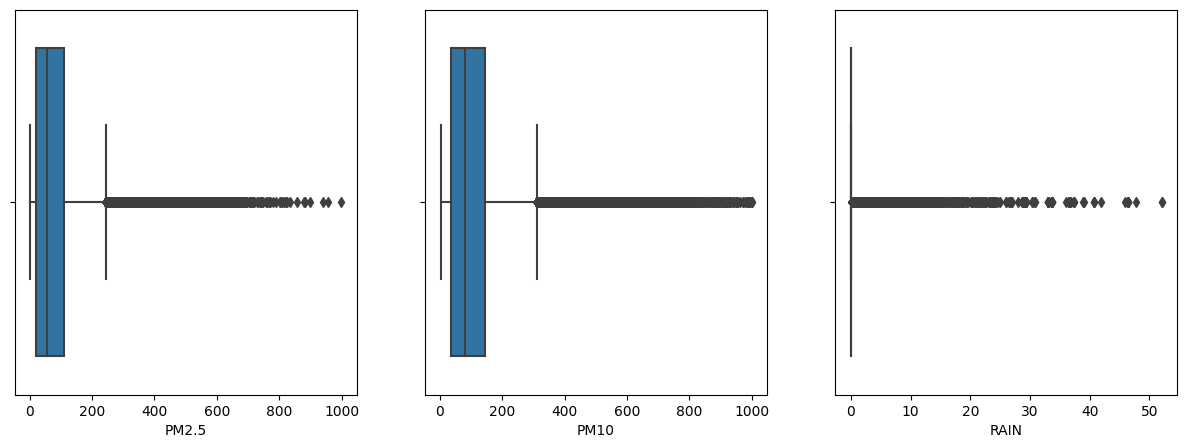

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=df_olah, x='PM2.5')
sns.boxplot(ax=axes[1], data=df_olah, x='PM10')
sns.boxplot(ax=axes[2], data=df_olah, x='RAIN')


dari data diatas dapat dilihat jika kolom year, month, day, hour memiliki data yang tidak terdapat outlier.
sedangkan untuk PM2.5 terdapat outlier dimana ada data dengan nilai 999 padahal rata-ratanya 79.85 dan standar deviasi yang besar
begitu juga untuk PM10

dan RAIN memiliki standar deviasi yang baik, sehingga tidak terdapat outlier

### Cleaning Data

Mengatasi data yang memiliki missing value dengan interplolation

In [8]:
df_olah['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)
df_olah['PM10'].interpolate(method='linear', limit_direction='forward', inplace=True)
df_olah['RAIN'].interpolate(method='linear', limit_direction='forward', inplace=True)

df_olah.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
RAIN       0
station    0
dtype: int64

Menangani data Outlier pada PM2.5 dan PM10 dengan interpolation

In [9]:
for col in ['PM2.5','PM10']:
    Q1 = (df_olah[col]).quantile(0.25)
    Q3 = (df_olah[col]).quantile(0.75)

    IQR = Q3 - Q1
    
    maximum = Q3 + (1.5*IQR)
    minimum = Q1 - (1.5*IQR)
    
    lower = df_olah[col] < minimum
    upper = df_olah[col] > maximum

    print(f"Jumlah Outlier < minimum value {col} = {lower.sum()}")
    print(f"Jumlah Outlier > maximum value {col} = {upper.sum()}")
    
    df_olah[col].mask(lower, minimum, inplace=True)
    df_olah[col].mask(upper, maximum, inplace=True)


Jumlah Outlier < minimum value PM2.5 = 0
Jumlah Outlier > maximum value PM2.5 = 16797
Jumlah Outlier < minimum value PM10 = 0
Jumlah Outlier > maximum value PM10 = 12722


In [10]:
df_olah.describe()

,year,month,day,hour,PM2.5,PM10,RAIN
count,332640.000000,332640.000000,332640.000000,332640.000000,332640.000000,332640.000000,332640.000000
mean,2015.103030,6.264069,15.709957,11.500000,75.475793,101.549706,0.063986
std,0.909185,3.540551,8.790594,6.922197,68.409529,81.501309,0.817422
min,2014.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000
25%,2014.000000,3.000000,8.000000,5.750000,20.000000,35.000000,0.000000
50%,2015.000000,6.000000,16.000000,11.500000,54.000000,81.000000,0.000000
75%,2016.000000,9.000000,23.000000,17.250000,110.000000,146.000000,0.000000
max,2017.000000,12.000000,31.000000,23.000000,245.000000,312.500000,52.100000


<AxesSubplot: xlabel='RAIN'>

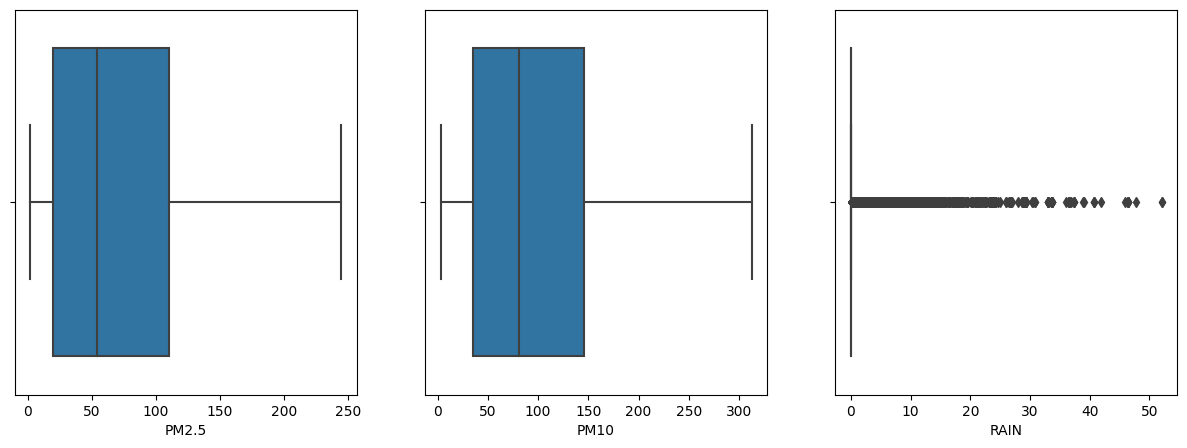

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=df_olah, x='PM2.5')
sns.boxplot(ax=axes[1], data=df_olah, x='PM10')
sns.boxplot(ax=axes[2], data=df_olah, x='RAIN')


## Exploratory Data Analysis (EDA)

Melihat korelasi antar data

C:\Users\adhityah.anugrah\AppData\Local\Temp\ipykernel_3208\3893095529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_olah.corr()


<AxesSubplot: >

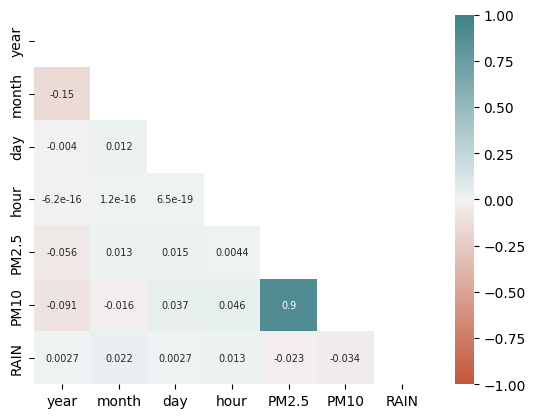

In [12]:
corrmat = df_olah.corr()

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize': 7},
            mask=mask,
            cmap=sns.diverging_palette(20, 200, as_cmap=True)
            )

Dari matriks korelasi diatas dapat dilihat jika antra hujan dan partiker PM2.5 serta PM10 memiliki korelasi negatif, 
tetapi memiliki nilai mendekati nol sehingga menyatakan bahwa hujan tidak terlalu memiliki korelasi terhadap partikel PM2.5 dan PM10

Melihat sebaran dari PM2.5 dan PM10

<AxesSubplot: xlabel='PM10', ylabel='Count'>

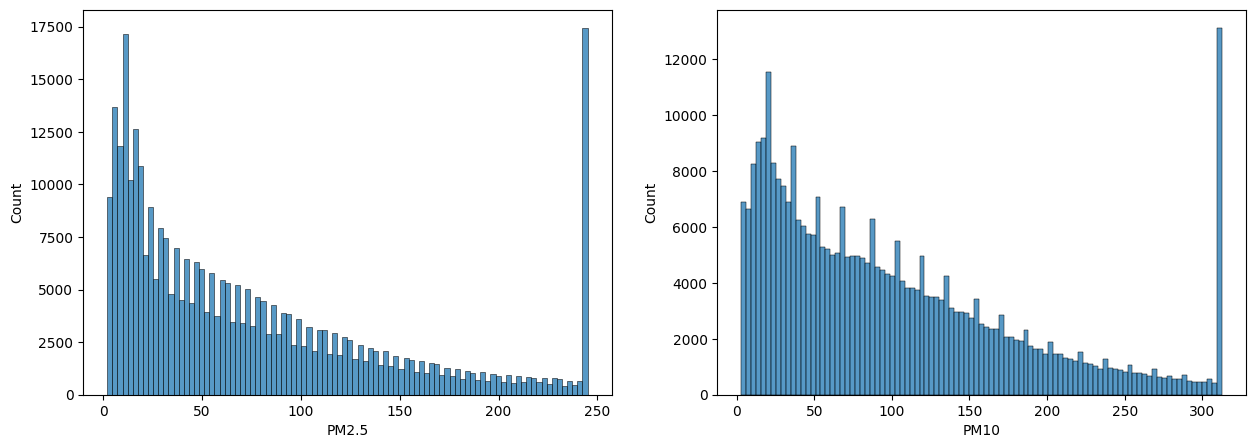

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

sns.histplot(ax=axes[0], data=df_olah, x='PM2.5')
sns.histplot(ax=axes[1], data=df_olah, x='PM10')


Partiket PM2.5 dan PM10 memiliki kemiringan ke kanan (right-skewed) yang berarti data tersebut memiliki partikel PM2.5 dan PM10 lebih banyak mendekati nol

Melihat Sebaran PM2.5 dan hujan, serta PM10 dan hujan

<AxesSubplot: xlabel='RAIN', ylabel='PM10'>

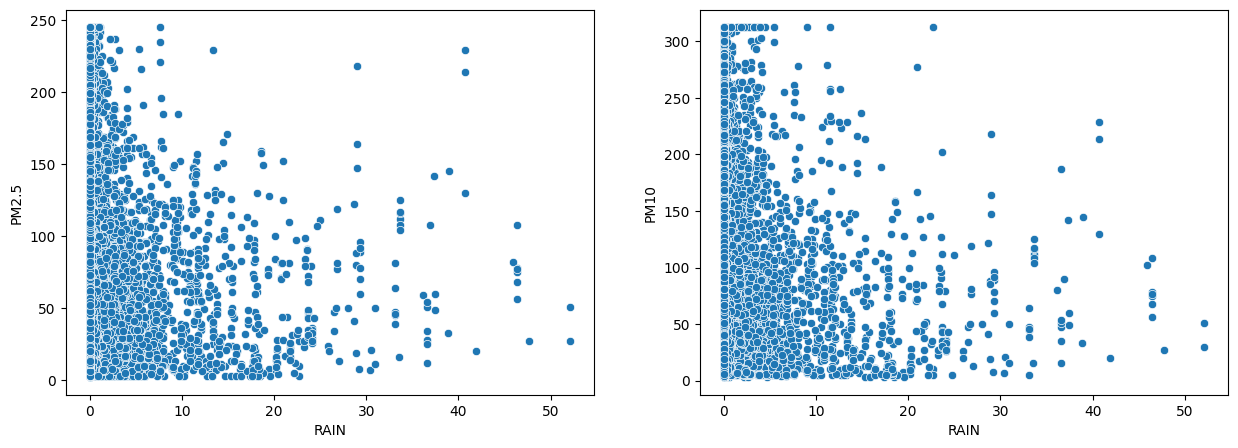

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(ax=ax[0], data=df_olah, x="RAIN", y="PM2.5")
sns.scatterplot(ax=ax[1], data=df_olah, x="RAIN", y="PM10")

Jika melihat pengaruh intensitas hujan secara perjam pada partikel PM2.5 dan PM10,
terlihat jika tidak banyak pengaruh hujan terhadap penurunan partikel PM2.5 dan PM10.
terdapat data dimana intensitas hujan diatas 20 tetapi partikel PM2.5 dan PM10 masih cukup tinggi. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah hujan mempengaruhi kondisi PM2.5 dan PM10

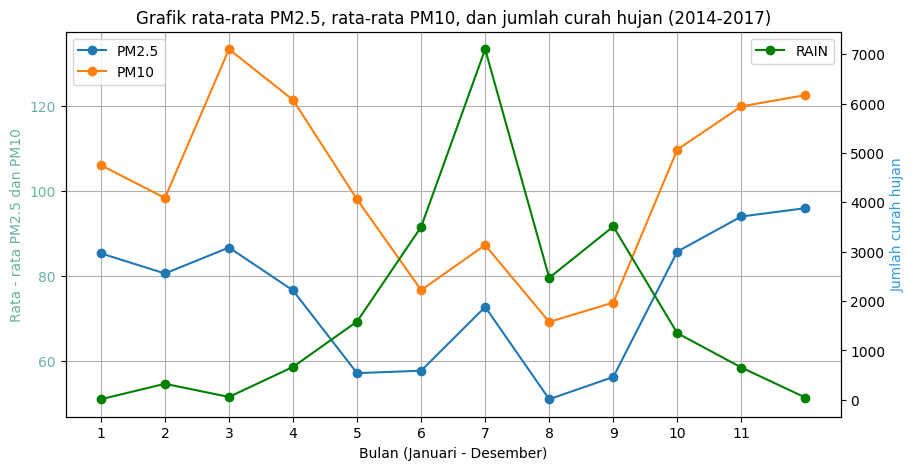

In [15]:
df_cek1 = df_olah.groupby(['month'], as_index=False).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'RAIN' : 'sum' 
})

fig, ax1 = plt.subplots(figsize=(10, 5)) 

# ax1.xaxis.set_ticks(1,12)

ax1.set_title('Grafik rata-rata PM2.5, rata-rata PM10, dan jumlah curah hujan (2014-2017)')

ax2 = ax1.twinx()

ax1.plot(df_cek1['month'], df_cek1['PM2.5'], label='PM2.5', marker='o')
ax1.plot(df_cek1['month'], df_cek1['PM10'], label='PM10', marker='o')
ax2.plot(df_cek1['month'], df_cek1['RAIN'], label="RAIN", marker='o', color="green")

ax1.set_xlabel("Bulan (Januari - Desember)")
ax1.set_ylabel("Rata - rata PM2.5 dan PM10", color="#69b3a2")
ax1.tick_params(axis="y", labelcolor="#69b3a2")

ax2.set_ylabel("Jumlah curah hujan", color="#3399e6")
ax2.tick_params(axis="y", labelcolor="#000000")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid()

ax1.set_xticks(np.arange(1,12,1))

Pada bulan Februari, April, Mei dan Juni intensitas hujan naik dan partikel PM2.5 dan PM10 ikut menurun,
tetapi pada Juli dan September, intensitas hujan naik sedangkan partikel PM2.5 dan PM10 nya ikut naik juga

Bila kita lihat juga, intensitas hujan tidak memiliki pola penurunan dan kenaikan partikel PM2.5 dan PM10 yang teratur.
Pada bulan April dan November, memiliki intensitas hujan yang mirip tetapi memiliki jumlah partikel PM2.5 dan PM10 yang berbeda. walau partikel PM10 nya cukup mirip tetapi untuk partikel PM2.5 nya cukup berbeda. Begitu juga untuk bulan Januari dan Desember.

### Pertanyaan 2: Bagaimana kondisi PM2.5 dan PM10 saat ada hujan dan tidak

Text(0.5, -0.05, 'Hujan : RAIN > 0.0 , Tidak Hujan : Rain = 0.0')

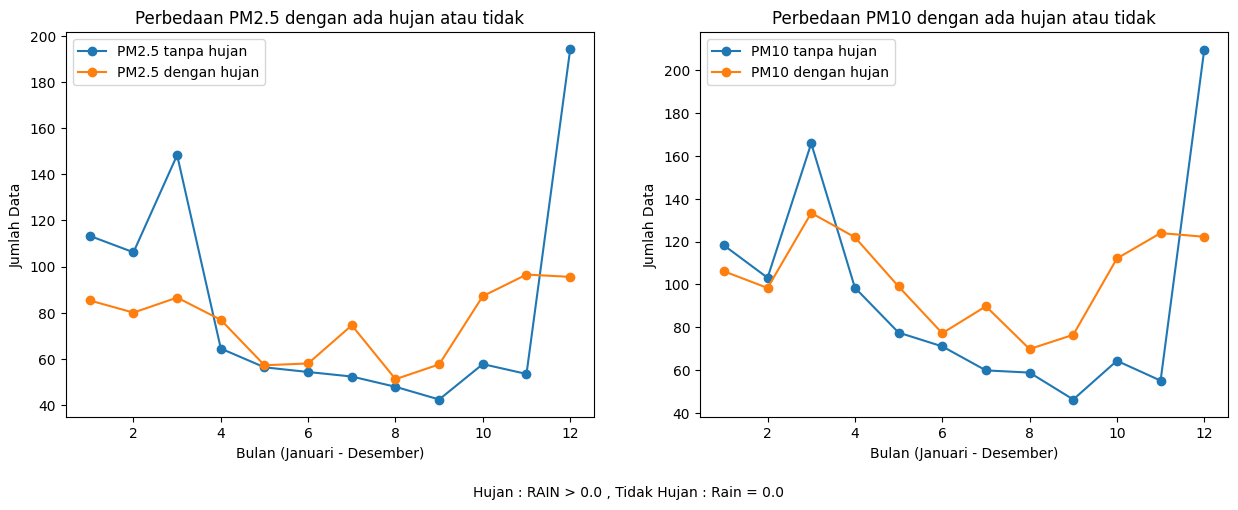

In [16]:
# df_tanpa_hujan = df_olah[df['RAIN'] > 0.0]
# df_dengan_hujan = df_olah[df['RAIN] == 0.0]

df_tanpa_hujan = df_olah[df_olah['RAIN'] > 0.0]
df_dengan_hujan = df_olah[df_olah['RAIN'] == 0.0]


df_tanpa_rekap_hujan = df_tanpa_hujan.groupby(['month'], as_index=False).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
})

df_dengan_rekap_hujan = df_dengan_hujan.groupby(['month'], as_index=False).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


ax1.plot(df_tanpa_rekap_hujan['month'], df_tanpa_rekap_hujan['PM2.5'], label='PM2.5 tanpa hujan', marker='o')
ax1.plot(df_dengan_rekap_hujan['month'], df_dengan_rekap_hujan['PM2.5'], label='PM2.5 dengan hujan', marker='o')

ax2.plot(df_tanpa_rekap_hujan['month'], df_tanpa_rekap_hujan['PM10'], label='PM10 tanpa hujan', marker='o')
ax2.plot(df_dengan_rekap_hujan['month'], df_dengan_rekap_hujan['PM10'], label='PM10 dengan hujan', marker='o')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

ax1.set_title('Perbedaan PM2.5 dengan ada hujan atau tidak')
ax2.set_title('Perbedaan PM10 dengan ada hujan atau tidak')

ax1.set_xlabel("Bulan (Januari - Desember)")
ax2.set_xlabel("Bulan (Januari - Desember)")

ax1.set_ylabel("Jumlah Data")
ax2.set_ylabel("Jumlah Data")

plt.figtext(0.5, -0.05, 'Hujan : RAIN > 0.0 , Tidak Hujan : Rain = 0.0', wrap=True, horizontalalignment='center', fontsize=10)





Dari grafik diatas partikel PM2.5 jika dilihat pada bulan Januari - Maret, PM2.5 tanpa hujan memang lebih tinggi dari PM2.5 dengan hujan,
tetapi pada bulan April - Desember kondisi ini terlihat berbalik, dimana PM2.5 tanpa hujan lebih rendah dari PM2.5 dengan hujan.
Dan pada bulan Mei, Juni, dan Agustus partikel PM2.5 dengan hujan atau tanpa hujan terlihat mirip.

begitu juga dengan partikel PM10 yang tidak terlihat pengaruh hujan terhadap penurunan partikel PM10.

### Pertanyaan 3: Apakah pengaruh curah hujan pada PM2.5 dan PM10

Berdasarkan penelitian https://www.hindawi.com/journals/amete/2020/2398146/,
secara per-jam, intensitas hujan dibagi menjadi 5 kelas,
- - light rain/Hujan Ringan (LR)        =   0 < R < 1.5  
  - moderate rain/Hujan Sedang (MR)     =   1.5 <= R < 3.5 
  - heavy rain/Hujan Deras (HR)         =   3.5 <= R < 8.0
  - torrential rain/Hujan Lebat (TR)    =   8.0 <= R < 20
  - downpour/Hujan Sangat Lebat (SR)    =   R > 20

  R = Rainfall (mm.h-1)


Text(0.5, 1.0, 'Pengarus curah hujan pada PM2.5 dan PM10')

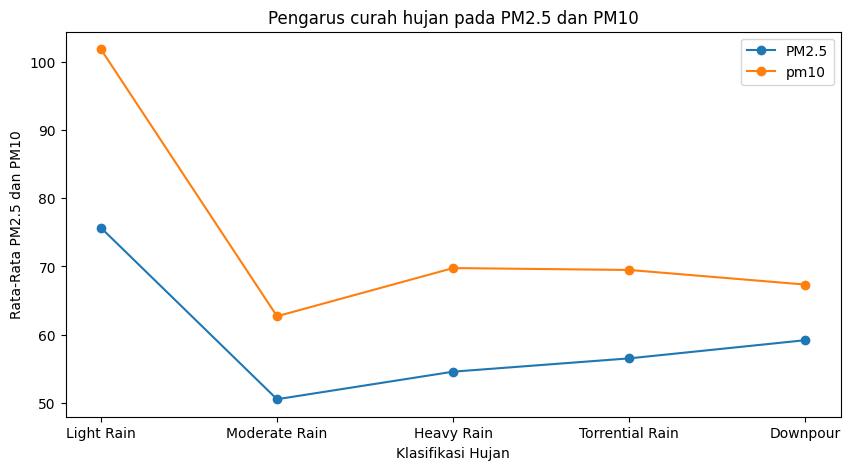

In [17]:
def rain_classification(rain):
    if rain >= 0 and rain < 1.5:
        return "Light Rain"
    elif rain >= 1.5 and rain < 3.5:
        return "Moderate Rain"
    elif rain >= 3.5 and rain < 8.0:
        return "Heavy Rain"
    elif rain >= 8.0 and rain < 20.0:
        return "Torrential Rain"
    else:
        return 'Downpour'
    
df_rain_class = df_olah;
df_rain_class['class'] = df_rain_class['RAIN'].apply(rain_classification)

df_rain_class

df_rekap_rain = df_rain_class.groupby('class').agg(
    {
        'PM2.5' : 'mean',
        'PM10' : 'mean'
    }
)


df_rekap_rain = df_rekap_rain.reindex(['Light Rain','Moderate Rain','Heavy Rain','Torrential Rain','Downpour'])
df_rekap_rain.reset_index(inplace=True)


fig, axes = plt.subplots(figsize=(10,5))

axes.plot(df_rekap_rain['class'], df_rekap_rain['PM2.5'], label="PM2.5", marker='o')
axes.plot(df_rekap_rain['class'], df_rekap_rain['PM10'], label="pm10", marker='o')


axes.set_xlabel("Klasifikasi Hujan")
axes.set_ylabel("Rata-Rata PM2.5 dan PM10")

axes.legend(loc="upper right")

axes.set_title('Pengarus curah hujan pada PM2.5 dan PM10')

Melihat grafik intensitas hujan diatas terlihat jika itensitas hujan tidak terlihat pengaruhnya.
karena pada Moderate Rain, partikel PM2.5 dan PM10 lebih rendah dari intensitas hujan lainnya yang lebih besar, malah cenderung menaik untuk partikel PM2.5 dan sedikit penurunan pada PM10.

## Conclusion

- Pangaruh hujan tidak terlihat terlalu berpengaruh dengan penurunan partikel PM2.5 dan PM10
- Penuruan partikel PM2.5 dan PM10 antara dengan hujan dan tanpa hujan tidak memiliki hubungan 
- intensitas hujan yang cukup tinggi sedikit mempengaruhi penuruan partikel PM10 tetapi tidak untuk partikel PM2.5